In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [60]:
data = pd.read_csv('Zoo.csv')

In [61]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [63]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


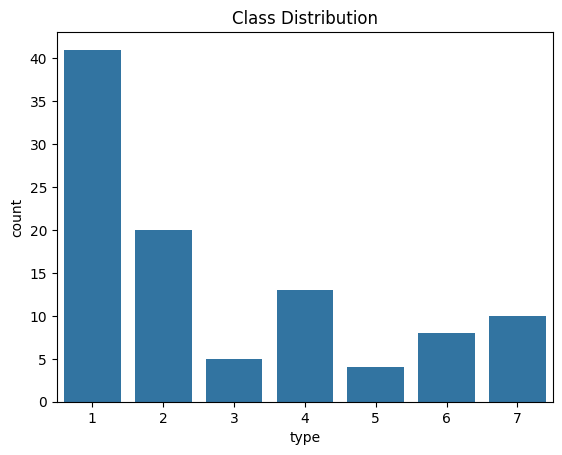

In [64]:
sns.countplot(x='type', data=data)
plt.title('Class Distribution')
plt.show()

In [65]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [66]:
data.drop('animal name',axis=1,inplace=True)

In [67]:
#Split the dataset into training and testing sets (80% training, 20% testing)
X = data.drop('type', axis=1)
y = data['type']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
k = 5  # Example value for K
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [71]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [72]:
# Make predictions
y_pred = knn.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [74]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [77]:
k_value = range(1, 31)  # Define range of k value for test
cv_score = []

for k in k_value:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv = 3, scoring='accuracy')
    cv_score.append(score.mean())

In [78]:
# Determine best k value
best = k_value[np.argmax(cv_score)]
print(f'Best k: {best}')

Best k: 1


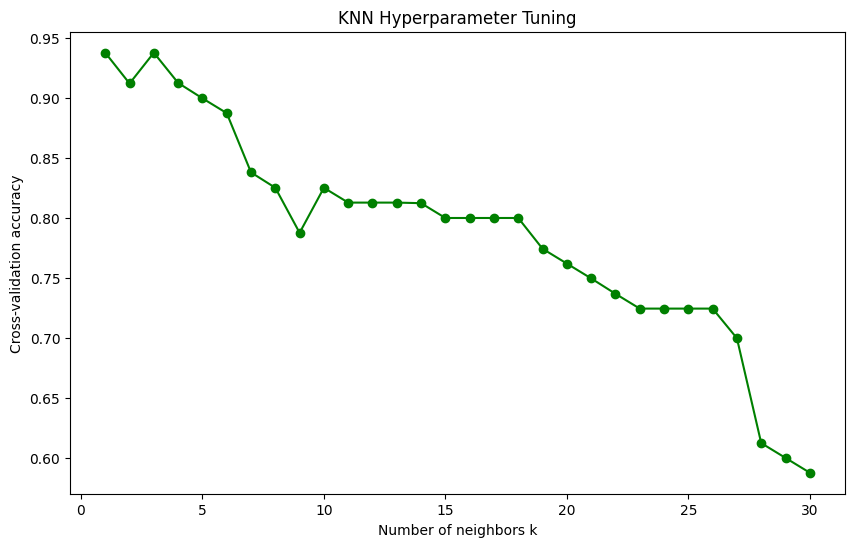

In [79]:
 #plot the result
plt.figure(figsize=(10, 6))
plt.plot(k_value, cv_score, marker = 'o', c='green')
plt.xlabel('Number of neighbors k')
plt.ylabel('Cross-validation accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

In [80]:
# Evaluate the model with the best k on the test set
best_knn = KNeighborsClassifier(n_neighbors=best)
best_knn.fit(X_train, y_train)
test_accuracy = best_knn.score(X_train, y_train)
print(f'Test accuracy with best k ({best}): {test_accuracy}')

Test accuracy with best k (1): 1.0


In [83]:
# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
Xpca_train = pca.fit_transform(X_train)

In [84]:
# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xpca_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
# Plotting decision regions
h = .02  # step size in the mesh
x_min, x_max = Xpca_train[:, 0].min() - 1, Xpca_train[:, 0].max() + 1
y_min, y_max = Xpca_train[:, 1].min() - 1, Xpca_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [86]:
# Predicting on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

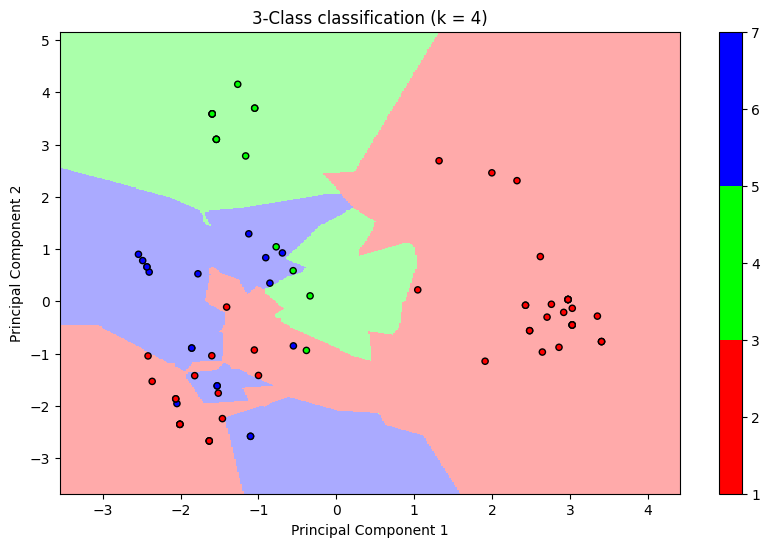

In [89]:
# Create a color plot with decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(Xpca_train[:, 0], Xpca_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.colorbar()
plt.title("3-Class classification (k = 4)")
plt.show()

# Interview Questions:

# 1. What are the key hyperparameters in KNN?

In [90]:
# K (Number of Neighbors): Determines the number of nearest neighbors considered for classification or regression.
# Distance Metric: Defines how distances between points are calculated (e.g., Euclidean, Manhattan).
# Weights: Assigns importance to neighbors

# 2. What distance metrics can be used in KNN?

In [91]:
#Euclidean Distance: Straight-line distance between two points.
#Manhattan Distance: Sum of absolute differences along each dimension.
#Minkowski Distance: Generalization of Euclidean and Manhattan distances.
#Hamming Distance: Used for categorical data.
#Cosine Similarity: Measures angular difference.